In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [250]:
dh = pd.ExcelFile("C:\\Users\\Anthony\\Pictures\\ml\\supervised-learning\\data\\avg-annual.xlsx")
dh.sheet_names

['ANNUAL AVERAGE ']

In [251]:
df = pd.read_excel("C:\\Users\\Anthony\\Pictures\\ml\\supervised-learning\\data\\avg-annual.xlsx", sheet_name="ANNUAL AVERAGE ", skiprows=1)
df.head()

,CODE,NAME,CATEGORY,ROUTE NO.,ROUTE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FINAL AVE.
0,1249,LANDLESS NEW,DIST,1,KITUI 1 SALES,37.870968,35.392857,38.096774,44.600000,41.645161,41.633333,39.548387,43.032258,39.933333,37.838710,37.100000,37.419355,39.509261
1,2058,KIBWEZI,DIST,1,KITUI 2 SALES,18.580645,17.107143,18.838710,16.700000,16.483871,16.033333,16.000000,15.032258,16.500000,18.096774,15.266667,16.548387,16.765649
2,2122,KITUI TOWN DEPOT,DIST,1,KITUI 2 SALES,16.838710,23.857143,21.870968,28.066667,26.032258,26.166667,25.096774,28.290323,28.566667,30.709677,30.366667,32.548387,26.534242
3,937,NAIVAS SUPERMARKET KITENGELA (0937),DSUPMK,2,KAJIADO SALES,11.806452,11.428571,11.258065,12.166667,11.354839,11.066667,9.774194,11.258065,9.733333,10.032258,10.966667,9.677419,10.876933
4,962,EASTMATT KITENGELA (0962),DSUPMK,2,KAJIADO SALES,10.451613,10.607143,9.580645,10.366667,9.516129,10.033333,9.161290,11.064516,9.966667,9.774194,10.900000,11.806452,10.269054


In [252]:
df.shape

(825, 18)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODE        825 non-null    int64  
 1    NAME       825 non-null    object 
 2   CATEGORY    825 non-null    object 
 3   ROUTE NO.   825 non-null    int64  
 4   ROUTE       825 non-null    object 
 5   JAN         825 non-null    float64
 6   FEB         825 non-null    float64
 7   MAR         825 non-null    float64
 8   APR         825 non-null    float64
 9   MAY         825 non-null    float64
 10  JUN         825 non-null    float64
 11  JUL         825 non-null    float64
 12  AUG         825 non-null    float64
 13  SEP         825 non-null    float64
 14  OCT         825 non-null    float64
 15  NOV         825 non-null    float64
 16  DEC         825 non-null    float64
 17  FINAL AVE.  825 non-null    float64
dtypes: float64(13), int64(2), object(3)
memory usage: 116.1+ KB


In [254]:
df.isna().sum()

CODE          0
 NAME         0
CATEGORY      0
ROUTE NO.     0
ROUTE         0
JAN           0
FEB           0
MAR           0
APR           0
MAY           0
JUN           0
JUL           0
AUG           0
SEP           0
OCT           0
NOV           0
DEC           0
FINAL AVE.    0
dtype: int64

In [255]:
df.describe()

,CODE,ROUTE NO.,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FINAL AVE.
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,1742.208485,49.329697,18.726217,18.639307,18.470577,19.351515,18.640704,18.846424,18.316285,18.941662,18.384929,18.454780,18.715758,19.088954,18.714759
std,909.376942,27.410187,27.649578,26.831015,26.354802,27.253327,26.725538,26.820240,26.016822,26.154500,26.245106,26.004241,26.168368,25.975202,26.274934
min,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1279.000000,33.000000,3.387097,3.500000,3.548387,3.600000,3.483871,3.500000,3.387097,3.516129,3.433333,3.354839,3.433333,4.064516,3.635778
50%,1757.000000,48.000000,9.096774,8.785714,8.935484,9.466667,9.225806,9.033333,8.967742,9.774194,9.233333,9.032258,9.266667,9.870968,9.148073
75%,2109.000000,67.000000,21.903226,22.678571,21.483871,23.233333,21.612903,22.533333,22.645161,23.225806,22.233333,22.322581,22.466667,23.193548,22.411630
max,7098.000000,108.000000,226.870968,222.464286,213.129032,212.900000,222.741935,218.666667,214.612903,206.806452,220.200000,215.225806,209.133333,204.032258,215.511540


In [256]:
# Duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Length: 825, dtype: bool

In [257]:
df.duplicated().sum()

np.int64(0)

In [258]:
df.dtypes

CODE            int64
 NAME          object
CATEGORY       object
ROUTE NO.       int64
ROUTE          object
JAN           float64
FEB           float64
MAR           float64
APR           float64
MAY           float64
JUN           float64
JUL           float64
AUG           float64
SEP           float64
OCT           float64
NOV           float64
DEC           float64
FINAL AVE.    float64
dtype: object

In [259]:
df.drop(columns=["ROUTE NO."], inplace=True)

In [260]:
df.columns

Index(['CODE', ' NAME', 'CATEGORY', 'ROUTE', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'FINAL AVE.'],
      dtype='object')

In [261]:
dh = df.copy()

In [262]:
df_numeric = dh.select_dtypes(include=[np.number])
code = df_numeric['CODE']
df_numeric.drop(columns=['CODE'], inplace=True)

In [263]:
df_numeric.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FINAL AVE.
0,37.870968,35.392857,38.096774,44.600000,41.645161,41.633333,39.548387,43.032258,39.933333,37.838710,37.100000,37.419355,39.509261
1,18.580645,17.107143,18.838710,16.700000,16.483871,16.033333,16.000000,15.032258,16.500000,18.096774,15.266667,16.548387,16.765649
2,16.838710,23.857143,21.870968,28.066667,26.032258,26.166667,25.096774,28.290323,28.566667,30.709677,30.366667,32.548387,26.534242
3,11.806452,11.428571,11.258065,12.166667,11.354839,11.066667,9.774194,11.258065,9.733333,10.032258,10.966667,9.677419,10.876933
4,10.451613,10.607143,9.580645,10.366667,9.516129,10.033333,9.161290,11.064516,9.966667,9.774194,10.900000,11.806452,10.269054


In [264]:
df_categorical = dh.select_dtypes(include=['object'])

# Add code column back to numeric dataframe
df_categorical['CODE'] = code

df_categorical.head()

,NAME,CATEGORY,ROUTE,CODE
0,LANDLESS NEW,DIST,KITUI 1 SALES,1249
1,KIBWEZI,DIST,KITUI 2 SALES,2058
2,KITUI TOWN DEPOT,DIST,KITUI 2 SALES,2122
3,NAIVAS SUPERMARKET KITENGELA (0937),DSUPMK,KAJIADO SALES,937
4,EASTMATT KITENGELA (0962),DSUPMK,KAJIADO SALES,962


In [265]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
scaler = StandardScaler()
dh_scaled = scaler.fit_transform(df_numeric)

In [266]:
dh_scaled

array([[ 0.69282665,  0.62478862,  0.74514327, ...,  0.70296301,
         0.70611655,  0.79189984],
       [-0.00526808, -0.05713887,  0.01397682, ..., -0.13188378,
        -0.09786673, -0.07422636],
       [-0.06830673,  0.19458827,  0.12910185, ...,  0.44549881,
         0.51847903,  0.2977829 ],
       ...,
       [-0.60063314, -0.34083137, -0.3424209 , ..., -0.71563924,
        -0.73533724, -0.58908521],
       [-0.34614376, -0.35015459, -0.35099404, ..., -0.71563924,
        -0.73533724, -0.60732609],
       [-0.67768039, -0.69511401, -0.70126809, ..., -0.71563924,
        -0.73533724, -0.71269872]], shape=(825, 13))

In [267]:
df = df_categorical.join(pd.DataFrame(dh_scaled, columns=df_numeric.columns))
df.head()

,NAME,CATEGORY,ROUTE,CODE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FINAL AVE.
0,LANDLESS NEW,DIST,KITUI 1 SALES,1249,0.692827,0.624789,0.745143,0.926999,0.861289,0.850132,0.816586,0.921647,0.821543,0.745866,0.702963,0.706117,0.791900
1,KIBWEZI,DIST,KITUI 2 SALES,2058,-0.005268,-0.057139,0.013977,-0.097350,-0.080752,-0.104950,-0.089084,-0.149564,-0.071864,-0.013776,-0.131884,-0.097867,-0.074226
2,KITUI TOWN DEPOT,DIST,KITUI 2 SALES,2122,-0.068307,0.194588,0.129102,0.319977,0.276740,0.273103,0.260778,0.357657,0.388183,0.471551,0.445499,0.518479,0.297783
3,NAIVAS SUPERMARKET KITENGELA (0937),DSUPMK,KAJIADO SALES,937,-0.250418,-0.268909,-0.273836,-0.263792,-0.272783,-0.290246,-0.328529,-0.293955,-0.329846,-0.324087,-0.296304,-0.362547,-0.298481
4,EASTMATT KITENGELA (0962),DSUPMK,KAJIADO SALES,962,-0.299448,-0.299543,-0.337522,-0.329879,-0.341625,-0.328798,-0.352101,-0.301360,-0.320950,-0.334017,-0.298853,-0.280534,-0.321631


In [268]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [269]:
df.columns

Index([' NAME', 'CATEGORY', 'ROUTE', 'CODE', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'FINAL AVE.'],
      dtype='object')

In [270]:
X = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY','JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y = df['FINAL AVE.']

In [271]:
X.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [272]:
X.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0.692827,0.624789,0.745143,0.926999,0.861289,0.850132,0.816586,0.921647,0.821543,0.745866,0.702963,0.706117
1,-0.005268,-0.057139,0.013977,-0.097350,-0.080752,-0.104950,-0.089084,-0.149564,-0.071864,-0.013776,-0.131884,-0.097867
2,-0.068307,0.194588,0.129102,0.319977,0.276740,0.273103,0.260778,0.357657,0.388183,0.471551,0.445499,0.518479
3,-0.250418,-0.268909,-0.273836,-0.263792,-0.272783,-0.290246,-0.328529,-0.293955,-0.329846,-0.324087,-0.296304,-0.362547
4,-0.299448,-0.299543,-0.337522,-0.329879,-0.341625,-0.328798,-0.352101,-0.301360,-0.320950,-0.334017,-0.298853,-0.280534


In [273]:
y.head()

0    0.791900
1   -0.074226
2    0.297783
3   -0.298481
4   -0.321631
Name: FINAL AVE., dtype: float64

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [276]:
# model predictions
y_pred = model.predict(X_test)
y_pred

array([ 1.36284141, -0.41206769, -0.38317969, -0.08681707,  0.63008984,
       -0.63161128, -0.27340412, -0.18408066,  1.69271825, -0.37023068,
       -0.12690012, -0.25236289, -0.43178736, -0.23532999, -0.54521027,
        0.36325626, -0.31454891, -0.47685662, -0.71269872, -0.63750714,
       -0.68207503, -0.50380566, -0.70515735, -0.01186314, -0.36432019,
       -0.63909   , -0.53238825, -0.46593579, -0.13447292, -0.37239827,
       -0.47836831, -0.5899054 , -0.61703066,  0.85745728, -0.57292929,
       -0.02578858,  0.1145863 , -0.42519585,  0.81165509, -0.48294821,
       -0.43620956, -0.40662153, -0.56922759, -0.70681236, -0.58947909,
       -0.66503458, -0.6428636 , -0.19312176, -0.32729098, -0.71269872,
        0.17658146,  0.71673434,  7.49444916, -0.69535017,  0.19216361,
        1.00668754, -0.64601055, -0.62662091, -0.52174114,  1.62320926,
       -0.62416546, -0.39927955, -0.38307951, -0.23928835, -0.64722536,
       -0.5161051 , -0.71218686, -0.39792825, -0.26311823, -0.34

In [277]:
# model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.596195877131257e-31
Root Mean Squared Error: 5.095287898766131e-16
Mean Absolute Error: 3.12923088114992e-16
R^2 Score: 1.0


In [278]:
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")

Train R^2 Score: 1.0
Test R^2 Score: 1.0


In [279]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
print("CV R² Mean:", cv_r2.mean())

CV R² Mean: 1.0


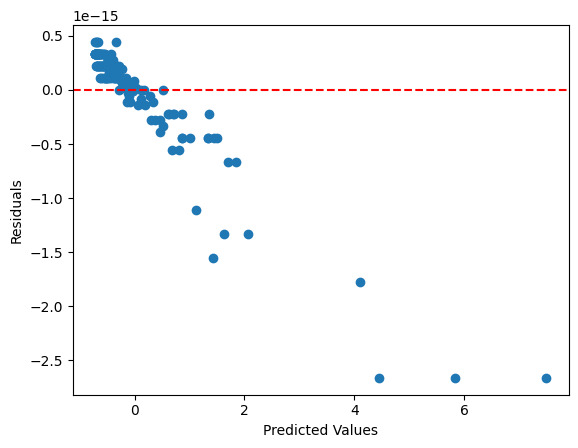

In [280]:
import matplotlib.pyplot as plt

# Add the trendline
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [281]:
# model test with real data
crates = {
    'JAN': 38,
    'FEB': 35,
    'MAR': 38,
    'APR': 45,
    'MAY': 42,
    'JUN': 42,
    'JUL': 40,
    'AUG': 43,
    'SEP': 40,
    'OCT': 38,
    'NOV': 37,
    'DEC': 37
}

crates_df = pd.DataFrame([crates])
predicted_value = model.predict(crates_df)
predicted_value

array([39.95940269])

In [282]:
# second test case with monthly values
new_crates = {
    'JAN': 19,
    'FEB': 17,
    'MAR': 19,
    'APR': 17,
    'MAY': 16,
    'JUN': 16,
    'JUL': 16,
    'AUG': 15,
    'SEP': 17,
    'OCT': 18,
    'NOV': 15,
    'DEC': 17
}

new_crates_df = pd.DataFrame([new_crates])
new_predicted_value = model.predict(new_crates_df)
new_predicted_value

array([16.99713479])

# Exploratory Data Analysis

In [283]:
df.columns

Index([' NAME', 'CATEGORY', 'ROUTE', 'CODE', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'FINAL AVE.'],
      dtype='object')

In [284]:
df.head()

,NAME,CATEGORY,ROUTE,CODE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FINAL AVE.
0,LANDLESS NEW,DIST,KITUI 1 SALES,1249,0.692827,0.624789,0.745143,0.926999,0.861289,0.850132,0.816586,0.921647,0.821543,0.745866,0.702963,0.706117,0.791900
1,KIBWEZI,DIST,KITUI 2 SALES,2058,-0.005268,-0.057139,0.013977,-0.097350,-0.080752,-0.104950,-0.089084,-0.149564,-0.071864,-0.013776,-0.131884,-0.097867,-0.074226
2,KITUI TOWN DEPOT,DIST,KITUI 2 SALES,2122,-0.068307,0.194588,0.129102,0.319977,0.276740,0.273103,0.260778,0.357657,0.388183,0.471551,0.445499,0.518479,0.297783
3,NAIVAS SUPERMARKET KITENGELA (0937),DSUPMK,KAJIADO SALES,937,-0.250418,-0.268909,-0.273836,-0.263792,-0.272783,-0.290246,-0.328529,-0.293955,-0.329846,-0.324087,-0.296304,-0.362547,-0.298481
4,EASTMATT KITENGELA (0962),DSUPMK,KAJIADO SALES,962,-0.299448,-0.299543,-0.337522,-0.329879,-0.341625,-0.328798,-0.352101,-0.301360,-0.320950,-0.334017,-0.298853,-0.280534,-0.321631


In [285]:
df_num = df.select_dtypes(include=[np.number])
code = df_num['CODE']
df_num.drop(columns=['CODE'], inplace=True)
df_num.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FINAL AVE.
0,0.692827,0.624789,0.745143,0.926999,0.861289,0.850132,0.816586,0.921647,0.821543,0.745866,0.702963,0.706117,0.791900
1,-0.005268,-0.057139,0.013977,-0.097350,-0.080752,-0.104950,-0.089084,-0.149564,-0.071864,-0.013776,-0.131884,-0.097867,-0.074226
2,-0.068307,0.194588,0.129102,0.319977,0.276740,0.273103,0.260778,0.357657,0.388183,0.471551,0.445499,0.518479,0.297783
3,-0.250418,-0.268909,-0.273836,-0.263792,-0.272783,-0.290246,-0.328529,-0.293955,-0.329846,-0.324087,-0.296304,-0.362547,-0.298481
4,-0.299448,-0.299543,-0.337522,-0.329879,-0.341625,-0.328798,-0.352101,-0.301360,-0.320950,-0.334017,-0.298853,-0.280534,-0.321631


In [ ]:
unstd_df = scaler.inverse_transform(df_num)
df_num = pd.DataFrame(unstd_df)
df_num

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,37.870968,35.392857,38.096774,44.600000,41.645161,41.633333,39.548387,43.032258,39.933333,37.838710,37.100000,37.419355,39.509261
1,18.580645,17.107143,18.838710,16.700000,16.483871,16.033333,16.000000,15.032258,16.500000,18.096774,15.266667,16.548387,16.765649
2,16.838710,23.857143,21.870968,28.066667,26.032258,26.166667,25.096774,28.290323,28.566667,30.709677,30.366667,32.548387,26.534242
3,11.806452,11.428571,11.258065,12.166667,11.354839,11.066667,9.774194,11.258065,9.733333,10.032258,10.966667,9.677419,10.876933
4,10.451613,10.607143,9.580645,10.366667,9.516129,10.033333,9.161290,11.064516,9.966667,9.774194,10.900000,11.806452,10.269054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,4.354839,3.500000,6.419355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.189516
821,0.516129,4.785714,3.967742,4.666667,3.483871,3.800000,3.741935,2.935484,0.000000,0.000000,0.000000,0.000000,2.324795
822,2.129032,9.500000,9.451613,6.600000,4.645161,4.400000,2.225806,0.000000,0.000000,0.000000,0.000000,0.000000,3.245968
823,9.161290,9.250000,9.225806,5.566667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766980


In [287]:
df_num.columns

RangeIndex(start=0, stop=13, step=1)

In [288]:
# Rename columns
df_num.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'FINAL AVE.']
df_num

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FINAL AVE.
0,37.870968,35.392857,38.096774,44.600000,41.645161,41.633333,39.548387,43.032258,39.933333,37.838710,37.100000,37.419355,39.509261
1,18.580645,17.107143,18.838710,16.700000,16.483871,16.033333,16.000000,15.032258,16.500000,18.096774,15.266667,16.548387,16.765649
2,16.838710,23.857143,21.870968,28.066667,26.032258,26.166667,25.096774,28.290323,28.566667,30.709677,30.366667,32.548387,26.534242
3,11.806452,11.428571,11.258065,12.166667,11.354839,11.066667,9.774194,11.258065,9.733333,10.032258,10.966667,9.677419,10.876933
4,10.451613,10.607143,9.580645,10.366667,9.516129,10.033333,9.161290,11.064516,9.966667,9.774194,10.900000,11.806452,10.269054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,4.354839,3.500000,6.419355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.189516
821,0.516129,4.785714,3.967742,4.666667,3.483871,3.800000,3.741935,2.935484,0.000000,0.000000,0.000000,0.000000,2.324795
822,2.129032,9.500000,9.451613,6.600000,4.645161,4.400000,2.225806,0.000000,0.000000,0.000000,0.000000,0.000000,3.245968
823,9.161290,9.250000,9.225806,5.566667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766980


In [289]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical['CODE'] = code
df_categorical.head()

,NAME,CATEGORY,ROUTE,CODE
0,LANDLESS NEW,DIST,KITUI 1 SALES,1249
1,KIBWEZI,DIST,KITUI 2 SALES,2058
2,KITUI TOWN DEPOT,DIST,KITUI 2 SALES,2122
3,NAIVAS SUPERMARKET KITENGELA (0937),DSUPMK,KAJIADO SALES,937
4,EASTMATT KITENGELA (0962),DSUPMK,KAJIADO SALES,962


In [290]:
df = pd.concat([df_categorical, df_num], axis=1)
df.columns

Index([' NAME', 'CATEGORY', 'ROUTE', 'CODE', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'FINAL AVE.'],
      dtype='object')

In [291]:
df.head()

,NAME,CATEGORY,ROUTE,CODE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FINAL AVE.
0,LANDLESS NEW,DIST,KITUI 1 SALES,1249,37.870968,35.392857,38.096774,44.600000,41.645161,41.633333,39.548387,43.032258,39.933333,37.838710,37.100000,37.419355,39.509261
1,KIBWEZI,DIST,KITUI 2 SALES,2058,18.580645,17.107143,18.838710,16.700000,16.483871,16.033333,16.000000,15.032258,16.500000,18.096774,15.266667,16.548387,16.765649
2,KITUI TOWN DEPOT,DIST,KITUI 2 SALES,2122,16.838710,23.857143,21.870968,28.066667,26.032258,26.166667,25.096774,28.290323,28.566667,30.709677,30.366667,32.548387,26.534242
3,NAIVAS SUPERMARKET KITENGELA (0937),DSUPMK,KAJIADO SALES,937,11.806452,11.428571,11.258065,12.166667,11.354839,11.066667,9.774194,11.258065,9.733333,10.032258,10.966667,9.677419,10.876933
4,EASTMATT KITENGELA (0962),DSUPMK,KAJIADO SALES,962,10.451613,10.607143,9.580645,10.366667,9.516129,10.033333,9.161290,11.064516,9.966667,9.774194,10.900000,11.806452,10.269054


In [292]:
df_num.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC', 'FINAL AVE.'],
      dtype='object')

In [ ]:
# Sum across all customers per month and plotting 12 monthly totals
month_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_totals = df_num[month_cols].sum(axis=0)

plt.figure(figsize=(10, 5))
monthly_totals.plot(kind='bar', color='steelblue')
plt.ylabel('Sum across customers')
plt.title('Monthly totals across all customers')
plt.xticks(rotation=45)
# value labels on bars
for idx, val in enumerate(monthly_totals.values):
    plt.text(idx, val, f"{val:.0f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
# line plot for trend
plt.figure(figsize=(10, 4))
monthly_totals.plot(kind='line', marker='o', color='darkorange')
plt.ylabel('Sum across customers')
plt.title('Monthly totals trend')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
# labels on points
for idx, val in enumerate(monthly_totals.values):
    plt.text(idx, val, f"{val:.0f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()